# Introduction to Logistic Regression
In this exercise, you will explore the characteristics of the logistic classifier. 

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#logreg">Task 1: Implementing the sigmoid function</a>
            </li>
            <li>
            <a href="#predict">Task 2: The prediction function</a>
            </li>
            <li>
            <a href="#evaluation">Task 3: Evaluation</a>
            </li>
            <li>
            <a href="#twoDsigmoiad">Task 4: Increasing input dimensions</a>
            </li>
            <li>
            <a href="#eval_2d">Task 5: 2D Predictions</a>
            </li>
            <li>
            <a href="#reflect_2d">Task 6: Reflection and plotting 2D</a>
            </li>
            <li>
            <a href="#reflect_3d">Task 7: Plotting in 3D</a>
            </li>
        </ul>
    </div>
</article>

The figure below shows a schematic of a multivariate logistic regression classifier.
<div class="has-text-centered">
<figure class="image is-inline-block" >

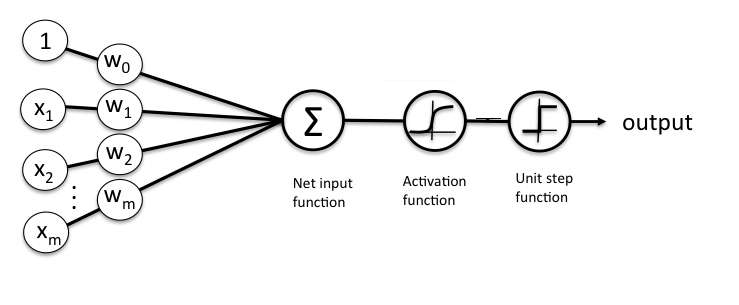


</figure>
</div>
A Logistic regression classifier consists of 3 distinct parts:

1. A multivariate linear function :  $z = \mathbf{w}^\top\mathbf{x} = \sum_iw_i*x_i +w_0$ , where $\mathbf{w}$ are the model parameters (including the bias term $w_0$) and $\mathbf{x}$ the homogeneous coordinates of the input

2. The sigmoid activation function $\sigma(z)=\frac{1}{1+\text{e}^{(-z)}}$ 

3. A binary step function (thresholding) at $\sigma(z)>0.5$.


The libraries used are imported in the next cell.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Experimenting with model parameters of the logistic (regression) classifier

---
**Task 1 (medium): Implementing the sigmoid function👩‍💻📽️**
In the following task you will implement steps 1 and 2 from above and visualize the output $\sigma(z)$  along with the decision boundary obtained in step 3. 
In the cell below:
1. Implement the function `linear_sigmoid`
, that calculates the variable $z$ as the linear combination of the input features $x$, the weights $w$, the bias $w_0$ and then returns the output of the sigmoid activation function applied to $z$.
2. Calculate the decision boundary for the logistic regression classifier where  $\sigma(z) = 0.5$. 
3. Run the cell below to plot the function values of `linear_sigmoid`
 using the values of `xs`
 as input, along with the calculated decision boundary.
4. Modify the model parameters `w`
 ($z = \mathbf{w}^\top\mathbf{x} = \sum_i w_i*x_i +w_0$) and observe their effect on the shape of the sigmoid function. What happens to the function when $w_i$:    - is small? (does it look similar to another function?)
    - is large? 
    - is zero?


5. How does a change of the bias $w_0$ affect the output of `linear_sigmoid`
?
6. Determine the x-values of the decision boundary (x-value where $\sigma(x)=0.5$ ) for the _logistic regression_-classifier. 


**Hint**
`z`
 must be zero in:

$$\sigma(z)=\frac{1}{1+\text{e}^{(-z)}}$$
for $\sigma(z)=0.5$, hence solve $w_0 + w x = 0$


---

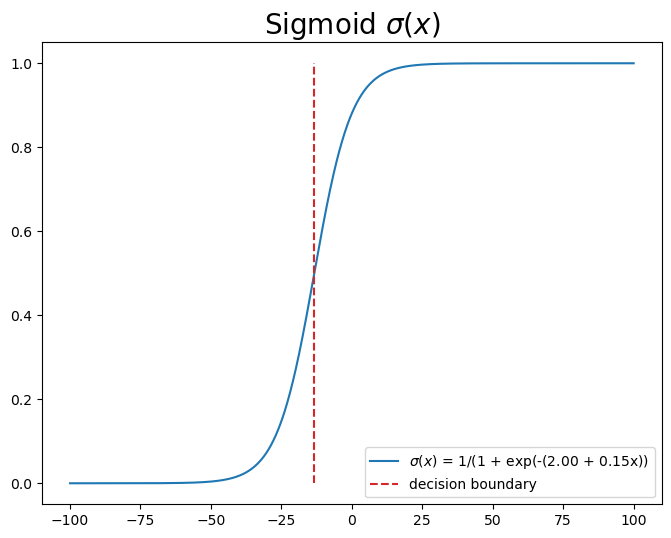

In [39]:
def linear_sigmoid(x,b,w) :  # sigmoid function
    """
    :param x: 1D array of the (single) input-feature values.
    :param b: The bias parameter of the model.
    :param W: The weight parameter of the model.
    
    :return (float): output values of the sigmoid function. 
    """
    sum_res = x*w+b
    sig = 1/(1 + np.exp(-sum_res))
    return sig

xs = np.linspace(-100,100,1000) ### linspace of "input features"
# Higher W gives steeper graph, Lower W gives softer slope
# Bias shifts where the slope starts aka shifts the entire function over
# 6 - Decisions boundry buddy
params = [2,0.15] ### parameters of the model

# Calc decision boundary here
Decision_boundary = -params[0]/params[1]# write your solution here

### plotting ####
plt.figure(figsize=(8,6))
plt.plot(xs, linear_sigmoid(xs,params[0],params[1]),label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
plt.plot([Decision_boundary,Decision_boundary],[0,1],'--C3',label = 'decision boundary')
plt.title(r"Sigmoid $\sigma(x)$", fontsize=20)
plt.legend()
plt.show()

The cell below generates two classes (`class1`
 and `class2`
) of data, drawn from normal distributions (with a different mean and variance)


In [29]:
### 2 classes of randomly generated data

x1= np.random.normal(-50,20,200)
y1 = np.zeros_like(x1)
x2= np.random.normal(50,30,200)
y2 = np.ones_like(x2)

`x1`
 and `x2`
 are the variables for the input features of `class1`
 and `class2`
, respectively. 
Likewise, `y1`
 and `y2`
 are the targets of `class1`
 and `class2`
, respectively. 
The following cell visualizes the data of the classes together with the `sigmoid`
 values and the decision boundary. 


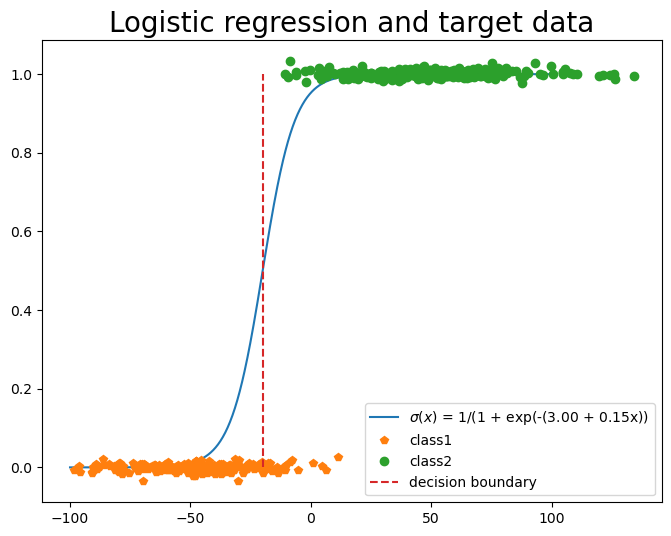

In [32]:
plt.figure(figsize=(8,6))
plt.plot(xs, linear_sigmoid(xs,params[0],params[1]),label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
plt.plot(x1, y1+np.random.normal(0,0.01,200),'p',label ='class1')
plt.plot(x2, y2+np.random.normal(-0,0.01,200),'o',label = 'class2')
plt.plot([-params[0]/params[1],-params[0]/params[1]],[0,1],'--C3',label = 'decision boundary')

plt.title(r"Logistic regression and target data", fontsize=20)
plt.legend()
plt.show()

In [0]:
#Write your reflections here...


---
**Task 2 (medium): The prediction function👩‍💻**
1. In the cell below implement the function `predict`
  using the `linear_sigmoid`
 function and binary thresholding to predict the class given input-features and model parameters.


---

In [35]:
def predict(x,w):
    """
    :param x: 1D array of the (single) input-feature values.
    :param w: The list of the model parameters, [bias, weight]. 
    
    :return: Boolean array same size as x, where a True values signifies class2, and False signifies class1
    """
    bool_arr = []

    sig = linear_sigmoid(x, w[0], w[1])
    for s in sig:
        if s > 0.5: 
            bool_arr.append(True)
        else:
            bool_arr.append(False)
    return np.array(bool_arr)

The cell below visualizes the predictions.


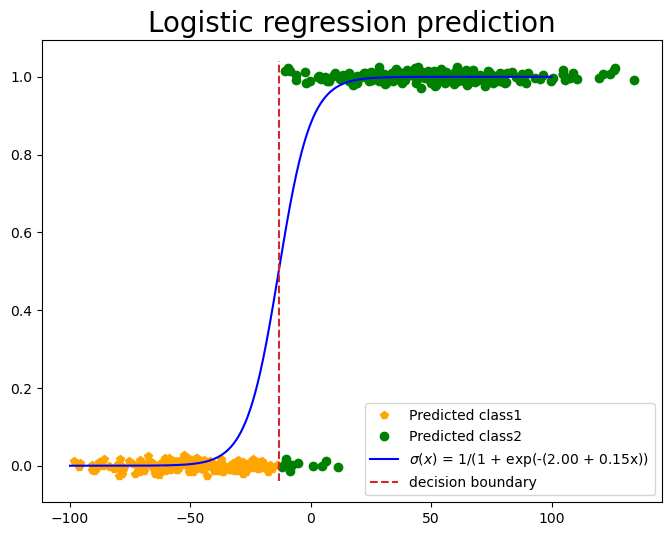

In [40]:
x_all = np.concatenate([x1,x2])
y_all = np.concatenate([y1+np.random.normal(0,0.01,200),y2+np.random.normal(-0,0.01,200)])
y_bool = predict(x_all,params)
plt.figure(figsize=(8,6))
plt.plot(x_all[~y_bool], y_all[~y_bool],'p',color='orange',label ='Predicted class1')
plt.plot(x_all[y_bool], y_all[y_bool],'go',label = 'Predicted class2')
plt.plot(xs, linear_sigmoid(xs,params[0],params[1]),'b',label = r"$\sigma(x)$ = 1/(1 + exp(-(%.2f + %.2fx))"%(params[0],params[1]))
plt.plot([-params[0]/params[1],-params[0]/params[1]],[-0.04,1.04],'--C3',label = 'decision boundary')
plt.title(r"Logistic regression prediction", fontsize=20)
plt.legend()
plt.show()


---
**Task 3 (medium): Evaluation👩‍💻💡**
1. Visually assess which model parameters `w`
 best seperate the two classes?
2. Calculate the accuracy of the classifier (fraction of correct predictions). 


---

In [0]:
# Code you solution here
# 1 - 2
# yes
# Fuck it we ball




---
**Task 4 (medium): Increasing input dimensions👩‍💻💡**
In this task the logistic regression function is modified to take 2 features as input (x,y).
1. Complete the `sigmoid2D`
 function such that it can take a vector of two 1D-arrays as input.
2. Run the cell below to visualize a 3D-plot of the 2-variable sigmoid function and the decision boundary plane 
3. The decision boundary is defined by the plane where $z\in[0,1]$ and x,y such that $ b + w_1*x+w_2*y = 0 $ . Why is this?
4. How does changing the individual model parameters  $w_1$  and  $w_2$  affect the orientation and slope of the decision boundary plane in the 3D plot?
5. What happens to the decision boundary if  $w_1$  or  $w_2$  is set to zero?


---

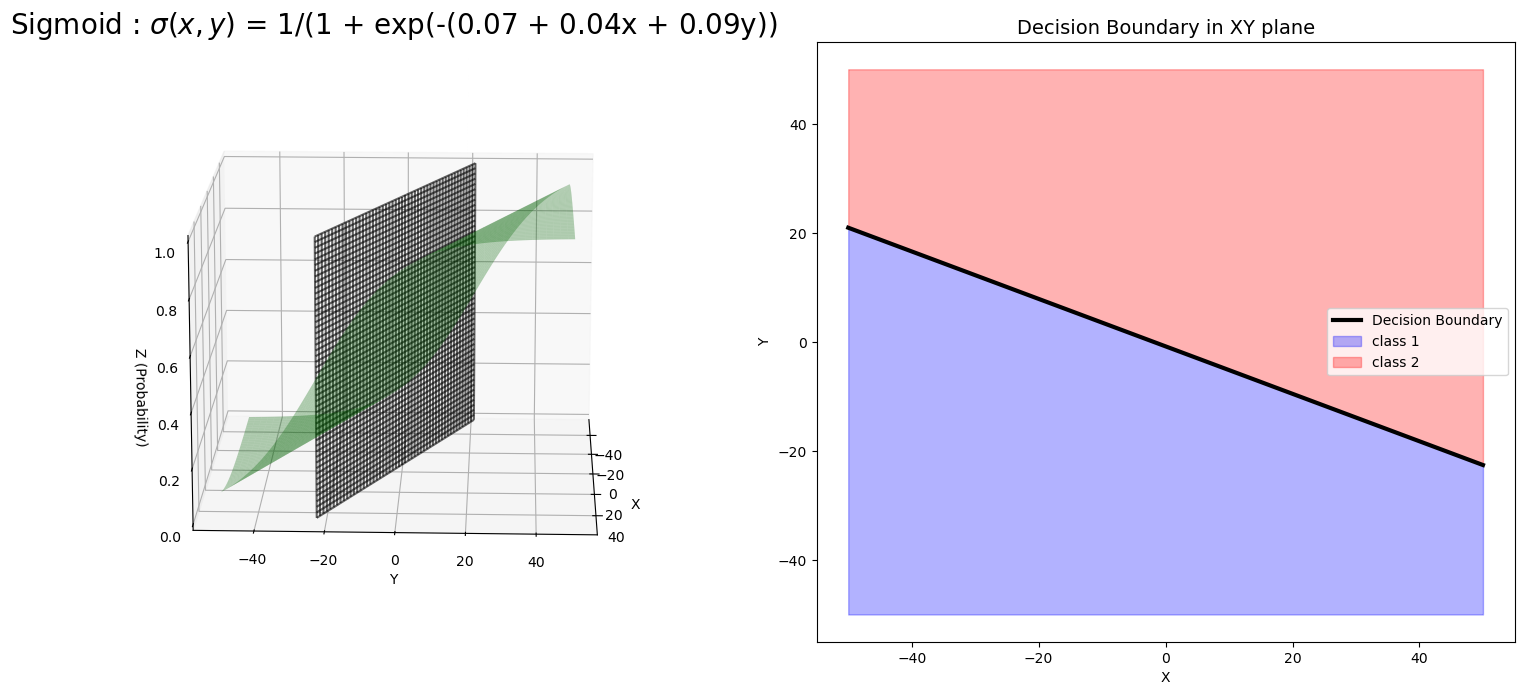

In [54]:
def sigmoid2D(X,params) :  # sigmoid function
    """
    :param X: tuple of input features (x,y).
    :param parametes: List of the model parameters.
    :return: output values of the sigmoid function. 
    """

    X, Y = X
    w0, w1, w2 = params
    linear_term = w0 + w1 * X + w2 * Y
    sog = 1 / (1 + np.exp(-linear_term))
    return sog

#### Plotting
x = np.linspace(-50, 50, 1000)
y = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(x, y)
params3 = [0.07,0.037,0.085]
Z = sigmoid2D((X, Y),params3)

fig = plt.figure(figsize=(15,7))

# ----- First subplot: 3D sigmoid function -----
ax1 = fig.add_subplot(1, 2, 1, projection='3d')  # 1 row, 2 columns, first plot

# Decision boundary plane calculation
y_decision_boundary = -(params3[0]/params3[2]) - (params3[1]/params3[2]) * x

# Create mesh for decision boundary plane in 3D space
Y_decision, Z_decision = np.meshgrid(y_decision_boundary, np.linspace(0, 1, 1000))  # z from 0 to 1 for probabilities
X_decision = np.tile(x, (len(Y_decision), 1))  # x values remain constant for the plane

# Plot the decision boundary as a wireframe to make it clearly visible
boundary_surface = ax1.plot_wireframe(X_decision, Y_decision, Z_decision, color='black', alpha=0.6, label='Decision Boundary')
sigmoid_surface = ax1.plot_surface(X, Y, Z, color='green', alpha=0.3)  # making it more transparent

ax1.set_title(r"Sigmoid : $\sigma(x,y)$ = 1/(1 + exp(-(%.2f + %.2fx + %.2fy))"%(params3[0],params3[1],params3[2]), fontsize=20)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z (Probability)')
ax1.view_init(elev=15., azim=2)

# ----- Second subplot: 2D projection of the decision boundary -----
ax2 = fig.add_subplot(1, 2, 2)  # 1 row, 2 columns, second plot

# Plot the decision boundary line
ax2.plot(x, y_decision_boundary, color='black',linewidth=3, label='Decision Boundary')
ax2.fill_between(x, y_decision_boundary, y[0], color='blue', alpha=0.3, label = 'class 1')  # Optional: fill area under the line
ax2.fill_between(x, y_decision_boundary, y[-1], color='red', alpha=0.3, label = 'class 2')  # Optional: fill area under the line

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Decision Boundary in XY plane', fontsize=14)
ax2.legend()

plt.tight_layout() 
plt.show()

In [0]:
# write your reflections here

Identically to above, we generate 2 classes (`class1`
 and `class2`
), but this time with two input features. 


In [0]:
S = 100*np.eye(2)
p1,q1 = np.random.multivariate_normal([20,8], S, 200).T
p2,q2 = np.random.multivariate_normal([-10,-13], S, 200).T

z1 = np.ones_like(q1)+np.random.normal(0,0.01,200)
z2 = np.zeros_like(q2)+np.random.normal(0,0.01,200)


---
**Task 5 (medium): 2D Predictions👩‍💻💡**
1. Implement `predict2D`
, that predicts the class (binary) of a 2D data input. 
2. Use `predict2D`
 to determine the accuracy of the logistic classifier. 
3. Manually choose parameters that result in an accuracy above $80\%$


---

In [0]:
def predict2D(X,params):
    """
    :param x: tuple of 1D arrays of the input-feature values.
    :param params: The list of the model parameters, [bias, weight1, weight2]. 
    
    :return: Boolean array same size as x, where a True values signifies class2, and False signifies class1
    """
    ...

# Provide you solution here


---
**Task 6 (medium): Reflection and plotting 2D👩‍💻💡**
1. Update the `params3`
 list with the best model parameters from task 3.

Run the cell below to:
- Plot the generated data together with the 2D input logistic function and decision boundary.
- Make a 2D projection plot in the XY plane of the decision boundary and the data points. Plot class 1 as blue and class 2 as red. 

2. Consider the last exercise on decision boundaries: are there any similarities between the linear descision boundary and the current 2D projection plot?


---

In [0]:
# Fill the empty list below with the best model parameters from task 3
params3 = []

x = np.linspace(-50, 50, 1000)
y = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(x, y)
Z = sigmoid2D((X, Y), params3)


# Decision boundary plane calculation
y_decision_boundary = -(params3[0] / params3[2]) - (params3[1] / params3[2]) * x


# Separate plot for the second subplot
fig, ax2 = plt.subplots(figsize=(10, 7))

# Plot the decision boundary line
ax2.plot(x, y_decision_boundary, color='black', linewidth=3, label='Decision Boundary')
ax2.plot(p1, q1, 'p', color='blue', label='class 1')
ax2.plot(p2, q2, 'o', color='red', label='class 2')
ax2.fill_between(x, y_decision_boundary, y[0], color='red', alpha=0.3, label='class 2 predictions')
ax2.fill_between(x, y_decision_boundary, y[-1], color='blue', alpha=0.3, label='class 1 predictions')

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Decision Boundary in XY plane', fontsize=14)
ax2.legend()

plt.show()


---
**Task 7 (medium): Plotting in 3D👩‍💻💡**
1. Consider the 3D plot below. Update the `params3`
 list with the best model parameters from task 3.

Run the cell below, then compare your plots to the 2D plot:
2. Which plot do you prefer. Argue for your choice.


---

In [0]:
# Fill the empty list below with the best model parameters from task 3
params3 = []

# Plotting data point along with the sigmoid
x = np.linspace(-50, 50, 1000)
y = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(x, y)


Z = sigmoid2D((X, Y),params3)

fig = plt.figure(figsize=(15,7))

# ----- First subplot: 3D sigmoid function -----
ax1 = fig.add_subplot(1, 1, 1, projection='3d')  # 1 row, 2 columns, first plot

# Decision boundary plane calculation
y_decision_boundary = -(params3[0]/params3[2]) - (params3[1]/params3[2]) * x

# Create mesh for decision boundary plane in 3D space
Y_decision, Z_decision = np.meshgrid(y_decision_boundary, np.linspace(0, 1, 1000))  # z from 0 to 1 for probabilities
X_decision = np.tile(x, (len(Y_decision), 1))  # x values remain constant for the plane

# Plot the decision boundary as a wireframe to make it clearly visible
boundary_surface = ax1.plot_wireframe(X_decision, Y_decision, Z_decision, color='black', alpha=0.6, label='Decision Boundary')
sigmoid_surface = ax1.plot_surface(X, Y, Z, color='green', alpha=0.3)  # making it more transparent
ax1.scatter(p1,q1,z1,'p',color ='red',label='class 1')
ax1.scatter(p2,q2,z2,'o',color='blue', label='class 2')

ax1.set_title(r"Sigmoid : $\sigma(x,y)$ = 1/(1 + exp(-(%.2f + %.2fx + %.2fy))"%(params3[0],params3[1],params3[2]), fontsize=20)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z (Probability)')
ax1.view_init(elev=15., azim=2)

plt.tight_layout() 
plt.show()

In [0]:
# write your reflections here